<br><p style="font-family: Arial; font-size:3em;color:purple; font-style:bold"><br>
Scanning  Razor Blade Method For Beam Size <br> <br><br>Measurement</p><br><br>

<p style="font-family:Arial;font-size:2.25em;color:Blue;font-style:bold"> Introduction </p>

<p style = "font-family: Times New Roman; font-size:16pt">For the measurement of the beam radius of a laser beam, scanning razor blade is a reliable and inexpensive method. As shown in the picture below, the edge of a razor is moved across the path of the beam, blocking a portion of it, and the power of the beam is recorded behind the razor. If the edge of the razor is at some position (say x), then the amount of power in the portion of the beam that passes the razor is given by 

$$
P(x) = \int_{-\infty}^{\infty}\int_{x}^{\infty} I(x',y')dx'dy'\\
$$
    <br>
$$
P(x) =\frac{\pi w_x w_y I_0}{4}~erfc\bigg[\frac{\sqrt{2}(x-x_0)}{w_x}\bigg] \\
$$
    <br>
$$
P(x) =\frac{P_{total}}{2}~erfc\Bigg[\frac{\sqrt{2}(x-x_0)}{w_x}\Bigg] \\
$$
  </p>
  
  <p style = "font-size:24pt">
where $erfc(z) = \frac{2}{\sqrt{\pi}}\int_z^{\infty}e^{-\xi^2}d\xi$
</p>
<p style = "font-family: Times New Roman; font-size:16pt">
    is a <em> complementary error function</em>. Also there is another error function <em>erf(z)</em> which is defined as the complement of the <em>erfc(x)</em> given by $erf(z) = 2-erfc(z)$ 
</p>

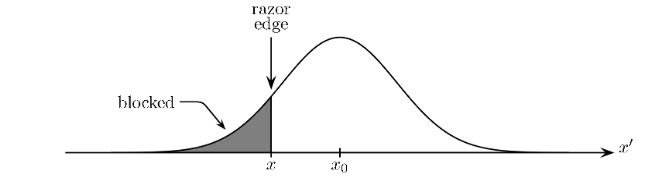

In [1]:
from IPython import display 
display.Image("./razor.jpg")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
import pandas as pd
from scipy import special
from scipy.optimize import curve_fit
%matplotlib inline

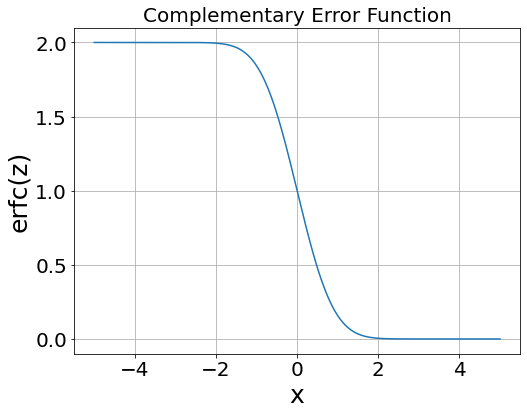

In [3]:
x = np.linspace(-5,5,1000)
y = special.erfc(x)

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
fig, axis = plt.subplots(figsize = (8,6))
# Grid lines, Xticks, Xlabel, Ylabel

axis.grid(True)
axis.set_title('Complementary Error Function',fontsize=20)
axis.set_xlabel('x',fontsize=25)
axis.set_ylabel('erfc(z)',fontsize=25)


axis.plot(x,y)
plt.show()


<p style="font-size:16pt"> Note here that the range of the function <em> erfc(z) is between 0 and 2 and that is asymptotically reaches those values as z <span>&#8594;</span> <span>&#177;</span>$\infty$
   

<p style = "font-size:24pt;color:blue">Some data and fit <p>

In [7]:
datas = pd.read_csv('beam_measurement.csv')
position_data = datas.Position
power_data = datas.Power_mW
power_data = power_data/max(power_data)

Text(0, 0.5, '$P/P_{max}$')

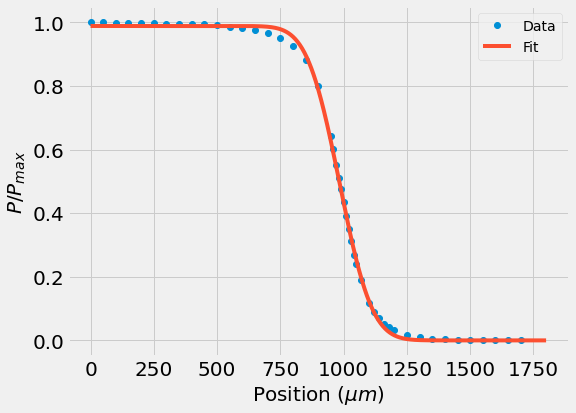

In [8]:
plt.style.use('fivethirtyeight')

fig, axis = plt.subplots(figsize = (8,6))

axis.plot(position_data,power_data,'o',label='Data')
initial_values = [1,np.mean(position_data),np.mean(position_data)/10]
def f(x,*params):
    return params[0]/2*(special.erfc((np.sqrt(2)*(x-params[1]))/params[2]))

#plt.plot(position_data,power_data,'o',label = 'Horizontal Data')
optimized_params,_ = curve_fit(f, position_data,power_data,initial_values)
positions_new = np.linspace(0,1800,1000)
fit_data = f(positions_new,optimized_params[0],optimized_params[1],optimized_params[2])

plt.plot(positions_new,fit_data,label = 'Fit')
axis.grid(True)

axis.set_xlabel('x',fontsize=25)
axis.set_ylabel('erfc(z)',fontsize=25)

axis.legend()
axis.set_xlabel('Position $(\mu m)$',fontsize = 20)
axis.set_ylabel('$P/P_{max}$',fontsize = 20)

In [6]:
print(' The beam size is {0:.3f} microns'.format(optimized_params[2]))
 

 The beam size is 202.069 microns


<p style = "font-family: Times New Roman; font-size:16pt">
 Depending on which direction the razor is moved, the fit function has to be chosen between the <strong><em> erfc </strong></em> or the <strong><em> erf </strong></em>   
    </p>